In [60]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Read Data
* Data Descriptions: https://www.kaggle.com/c/titanic/data

In [53]:
# 본인의 환경에 맞게 경로 설정 해주세요.
train = pd.read_csv('Data/titanic/train.csv')
test = pd.read_csv('Data/titanic/test.csv')

In [54]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [55]:
test.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
282,1174,3,"Fleming, Miss. Honora",female,NaN,0,0,364859,7.75,NaN,Q


## Check null values

In [58]:
train.shape

(891, 12)

In [56]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
test.shape

(418, 11)

In [57]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# EDA

In [8]:
# 어떤 feature가 Survived 컬럼을 유의미하게 설명하는지 분석해보세요.

In [9]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


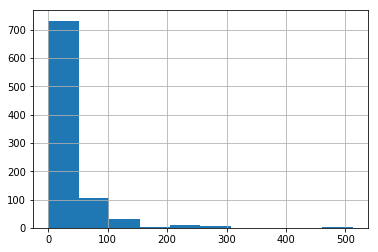

In [10]:
train['Fare'].hist()

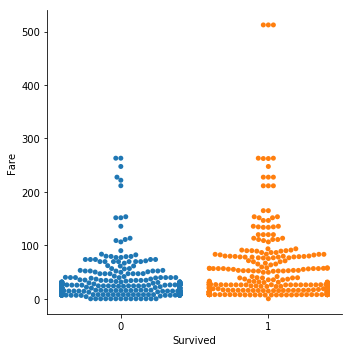

In [64]:
sns.catplot(x='Survived', y='Fare', kind='swarm', data=train)

# Concat Data
train test 테이블을 합쳐서 한번에 encoding

In [11]:
train_except_Survived = train.drop('Survived', axis=1)

In [12]:
train_except_Survived['tag'] = 'train'
test['tag'] = 'test'

In [33]:
df = pd.concat([train_except_Survived, test])

# Feature Engineering

In [34]:
# 작업

In [35]:
# 작업 예시
# fill data which contains null value in columns we want to use
# but fill null data as zero is not the best choice. find a better way.
# null이 있다면 0으로 채워줍니다. 최선의 방법은 아닙니다. 더 좋은 방법을 찾아보세요!
# df = df.fillna(0)

In [36]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tag
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,train
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,train
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,train
5,6,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,0,Q,train
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,train
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S,train
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S,train
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C,train


In [37]:
df['Sex_encode'] = df['Sex'].replace({'male': 0, 'female': 1})

In [40]:
df.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tag,Sex_encode
379,1271,3,"Asplund, Master. Carl Edgar",male,5.0,4,2,347077,31.3875,0,S,test,0


# Make dataset for model fitting

independents|dependent
-|-
독립변수|종속변수
$X$|$y$

- $X$ 대문자: Metrix
- $y$ 소문자: Vetor

In [47]:
# choose independent variables(Xs) which are useful!
# 트레이닝에 사용할 변수 목록을 적어주세요.
independents = ['Pclass', 'Sex_encode']
dependent = ['Survived']

In [48]:
# 적어준 변수 목록을 사용해 데이터를 트레이닝에 맞는 포맷으로 변경합니다.
train_X = df[df['tag'] == 'train'][independents]
train_y = train[dependent] # survived 칼럼은 전처리하면서 뺐으니까

test_X = df[df['tag'] == 'test'][independents]

# Model fitting

In [49]:
# 학습 fit()
reg = LinearRegression().fit(train_X, train_y)

In [50]:
# x 계수
# x 계수의 의미를 해석하세요.
reg.coef_

array([[-0.15803412,  0.51666965]])

In [51]:
# 절편
reg.intercept_

array([0.56660147])

In [52]:
# R-squared
reg.score(train_X, train_y, sample_weight=None)

0.36768020891350406

# Prediction
실수로 나오는 예측값을 0/1로 변경

In [22]:
prediction = reg.predict(test_X)

In [23]:
# Threshold 값 바꿀 수 있다

# 회귀 예측 결과를 classification으로 바꿔주기
# 여기에서는 회귀 예측 결과가 0.5 이상일 때에는 1, 그렇지 않으면 0으로 바꿔줬습니다.
prediction_binomial = [1 if p>=0.5 else 0 for p in prediction]

In [24]:
df = pd.DataFrame({'prediction': [p[0] for p in prediction],
                   'prediction_binomial': prediction_binomial})

In [27]:
df.sample()

,prediction,prediction_binomial
162,0.444639,0


# Submission

In [28]:
submission = pd.read_csv('Data/titanic/gender_submission.csv')

In [29]:
submission['Survived'] = df['prediction_binomial']

In [30]:
submission.to_csv('./submission_baseline.csv', index=False)

# Rules
* 주어진 시간을 준수해주세요. Kaggle 제출과 채점까지 마친 상태여야 합니다.
* 모방은 창조의 어머니! 먼저 데이터를 분석해본 분석가들의 노트북을 보고 따라하세요.
* 새롭게 배우게 된 지식을 동료와 공유하세요.

# Hint
1. Logistic Regression으로도 풀어보세요. (이외에 다른 모델 사용 가능)
2. null 값이 있는 컬럼을 사용한다면, 현명하게 채워보세요.
3. Sex 컬럼을 regression에 넣을 수 있는 형태로 변형하세요.
4. 기존 데이터를 사용해 새로운 의미있는 변수를 만들어보세요. (캐글에 다른 노트북들을 참고하세요.)
    ### 참고해볼만한 노트북:
    * https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic
    * https://www.kaggle.com/ash316/eda-to-prediction-dietanic

# 로지스틱 회귀?
* https://ratsgo.github.io/machine%20learning/2017/04/02/logistic/
* https://ratsgo.github.io/machine%20learning/2017/07/02/logistic/